## PART1-Eigenfaces(NP-PCA-Eigenface/RF & TF-PCA-Eigenface/RF based face recognition)

In [3]:
pip install scikit-learn scipy matplotlib tensorflow-gpu


  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.1.0 requires gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
tensorflow 2.1.0 requires scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.2 which is incompatible.
tensorflow 2.1.0 requires tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.3.0 which is incompatible.
tensorflow-gpu 2.3.1 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.1 which is incompatible.


In [4]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [6]:
#Loading the Labeled Faces in the Wild dataset
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [7]:
# Storing the number of images, height and width of each image
n_samples, h, w = lfw_people.images.shape
n_samples, h, w

(1288, 50, 37)

In [8]:
# Extracting the number of features in the LFW data set
X = lfw_people.data
n_features = X.shape[1]
n_features

1850

In [9]:
# Finding the number of classes in the LFW data set
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]
n_classes

7

In [10]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [11]:
#It is important in machine learning to split the data accordingly into training and testing sets to
#avoid contamination of the model. Ideally, you should also have a validation set.
# Split into a training set and a test set using a stratified k fold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

n_components = 150

In [13]:
#Compute the PCA via eigen-decomposition of the data matrix X after the mean of the training set
#is removed. This results in a model with variations from the mean. We also transform the training and
#testing data into ’face space’, i.e. the learned sub space of the eigen-faces.



In [14]:
# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

In [15]:
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

(966, 150)
(322, 150)


In [16]:
# Finally, plot the resulting eigen-vectors of the face PCA model, AKA the eigenfaces
import matplotlib.pyplot as plt

In [17]:
# Qualitative evaluation of the predictions using matplotlib

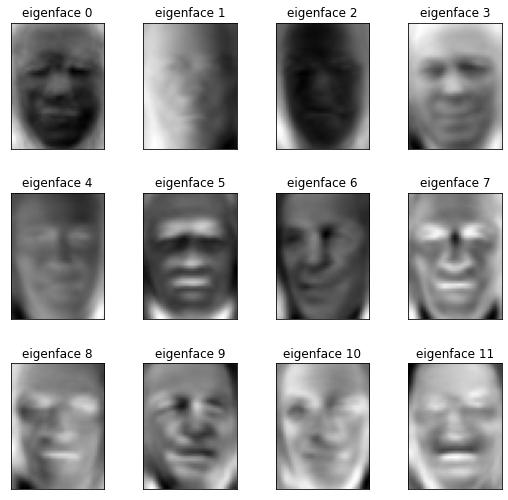

In [18]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [19]:
# To evaluate the performance of the dimensionality reduction via a compactness plot

(966,)


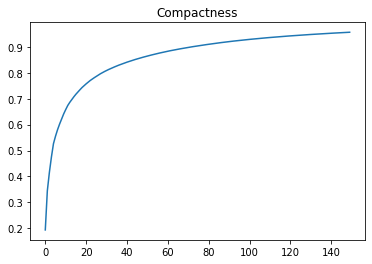

In [20]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [21]:
# To Using the PCA ’face space’ as features and build a random forest classifier to classify the faces according
#to the labels. We then view its classification performance.

X_transformed.shape


(966, 150)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))

Total Testing 322
Predictions [3 3 1 3 3 3 3 1 3 3 3 6 3 3 3 3 6 3 3 4 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 3 3 3 3 4 3 3 3 3 3 1 2 1 3 1 3 1 1 6 6 2 4 1 4 1 3 4 6 3 3
 3 2 3 1 1 3 6 3 3 3 3 3 3 3 3 3 3 6 3 3 1 1 3 1 3 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 1 4 1 3 1 3 3 1 3 4 4 3 1 3 6 6 6 3 3 4 3 3 1 3 1 3 3 1 3 6 1 3
 3 1 1 3 3 3 3 3 6 3 3 3 6 5 5 1 3 3 5 1 3 3 1 3 3 1 6 3 3 2 2 3 3 3 3 3 3
 3 3 3 3 2 4 3 2 3 4 3 3 3 3 6 3 3 3 2 3 3 6 2 4 2 1 5 3 3 3 4 3 2 3 3 3 3
 3 1 1 3 3 3 1 3 3 3 3 0 3 1 3 3 3 3 3 4 3 3 3 3 3 3 3 4 4 3 3 4 3 6 3 1 3
 3 3 3 3 1 3 4 1 3 3 1 6 3 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 5 3 4 3 3 5 3 3 3
 3 3 3 3 3 6 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3]
Which Correct: [ True  True False  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False  True
 False  T

In [23]:
# Precision(quality)= TP/TP+FP,Recall(remember some are missed !)= TP/TP+FN. Both are the highest the better.

In [24]:
# PCA with TF(instead of NP)BAsed Face recognition

In [25]:
import tensorflow as tf

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#The functionality of numpy.mean and tensorflow.reduce_mean are the same.c = np.array([[3.,4], [5.,6], [6.,7]])
#print(np.mean(c,1))

#Mean = tf.reduce_mean(c,1)
#with tf.Session() as sess:
    #result = sess.run(Mean)
    #print(result)
#Output

#[ 3.5  5.5  6.5]
#[ 3.5  5.5  6.5]
#Here you can see that when axis(numpy) or reduction_indices(tensorflow) is 1, it computes mean across (3,4) and (5,6) and (6,7), so 1 defines across which axis the mean is computed. When it is 0, the mean is computed across(3,5,6) and (4,6,7), and so on. I hope you get the idea.

In [27]:
# Center data(normalize by calculating the mean and removing the mean)
mean_train = tf.reduce_mean(X_train, axis=0)
X_train -= mean_train

mean_test = tf.reduce_mean(X_test, axis=0)
X_test -= mean_test

In [28]:
# Implementing singular value decomposition on centered train and test LFW data sets using tensorflow
s_train, u_train, v_train = tf.linalg.svd(X_train,full_matrices=False)
s_test, u_test, v_test = tf.linalg.svd(X_test,full_matrices=False)

In [29]:
# Right singular vector in tensorflow needs to be applied tf.linalg.adjoint to extract the top 150 principal components
v_train_adj = tf.linalg.adjoint(v_train)
components_train = v_train_adj[:n_components]

In [30]:
components_train

<tf.Tensor: shape=(150, 1850), dtype=float32, numpy=
array([[-0.00683411, -0.00751215, -0.0091807 , ..., -0.01421068,
        -0.0128538 , -0.01177942],
       [-0.02300881, -0.02153284, -0.02274896, ...,  0.04403267,
         0.04320137,  0.04226771],
       [ 0.02185679,  0.02013559,  0.01897717, ...,  0.05728261,
         0.05086858,  0.04724889],
       ...,
       [-0.05292905, -0.01479547,  0.012141  , ..., -0.03065149,
        -0.02561252,  0.03245838],
       [ 0.02890093,  0.00192243,  0.01828844, ...,  0.03044016,
        -0.02416587, -0.03625802],
       [ 0.08416209,  0.01718812, -0.03990266, ...,  0.00238374,
         0.01691062,  0.04615176]], dtype=float32)>

In [31]:
eigenfaces_train = tf.reshape(components_train,[n_components, h, w])

In [32]:
eigenfaces_train

<tf.Tensor: shape=(150, 50, 37), dtype=float32, numpy=
array([[[-0.00683411, -0.00751215, -0.0091807 , ..., -0.00969871,
         -0.00899151, -0.00930517],
        [-0.00728523, -0.00841976, -0.01084005, ..., -0.01018027,
         -0.00921194, -0.0097723 ],
        [-0.00828152, -0.01002305, -0.01281666, ..., -0.01127214,
         -0.00974055, -0.01002432],
        ...,
        [-0.00361066, -0.00369118, -0.00610599, ..., -0.01592615,
         -0.01441486, -0.0134325 ],
        [-0.00528679, -0.00519284, -0.00625762, ..., -0.01546607,
         -0.01349356, -0.01246521],
        [-0.00624801, -0.00626495, -0.00675036, ..., -0.01421068,
         -0.0128538 , -0.01177942]],

       [[-0.02300881, -0.02153284, -0.02274896, ...,  0.02109651,
          0.02166515,  0.02133398],
        [-0.02268489, -0.02194526, -0.02448395, ...,  0.02175771,
          0.02232642,  0.02191341],
        [-0.02292291, -0.02327836, -0.02639801, ...,  0.02288339,
          0.02309851,  0.02302811],
        ...,

In [33]:
# Transforming the centered train and test data into PCA subspace by applying dot product on centered data and the transpose
# of the components vector
X_transformed_train = tf.tensordot(X_train, tf.transpose(components_train),axes=1)
print(X_transformed_train)
X_transformed_test = tf.tensordot(X_test, tf.transpose(components_train),axes=1)
print(X_transformed_test)

tf.Tensor(
[[-1.40490088e+03  6.53937500e+02  9.01536133e+02 ...  5.78823328e-01
  -2.51675148e+01  1.49638405e+01]
 [ 9.36914612e+02 -3.72977051e+02  2.28335144e+02 ... -1.76248894e+01
   4.13867092e+00 -1.61752739e+01]
 [-5.36964844e+02  1.30083923e+01 -1.02484009e+02 ...  5.00683022e+00
   1.54671402e+01  3.14794636e+01]
 ...
 [-5.35507263e+02 -2.32011719e+01 -9.06315918e+01 ...  3.36936569e+01
   1.92363205e+01  2.99772682e+01]
 [-1.88154007e+02 -5.24451538e+02 -9.61454697e+01 ...  2.62867279e+01
   1.30799265e+01  8.59908867e+00]
 [-9.30934143e+02  7.07416565e+02  6.70746307e+01 ...  2.86967335e+01
   6.45915985e+01  8.69169140e+00]], shape=(966, 150), dtype=float32)
tf.Tensor(
[[-1.0329313e+03  1.1404209e+03 -4.0115814e+02 ... -2.2602458e+00
  -5.5006454e+01  4.6564362e+01]
 [-6.4381342e+02 -9.6691541e+02 -2.9849774e+02 ...  4.5813362e+01
  -1.9225382e+00  1.4535589e+01]
 [-7.1075977e+02  1.6347701e+02 -5.1524353e+02 ... -1.7704050e+01
   2.5693153e+01 -4.9514172e+01]
 ...
 [ 2.7

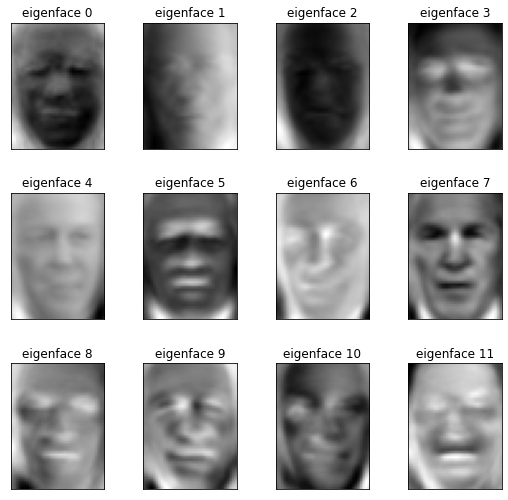

In [34]:
plot_gallery(eigenfaces_train.numpy(),eigenface_titles,h,w)
plt.show()

In [35]:
# To evaluate the performance of the dimensionality reduction via a compactness plot

(966,)


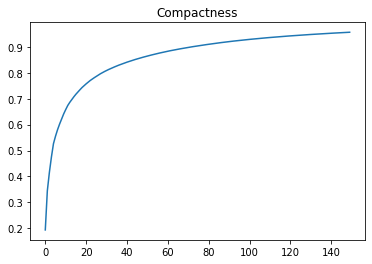

In [36]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [37]:
# To Using the PCA ’face space’ as features and build a random forest classifier to classify the faces according
#to the labels. We then view its classification performance.

X_transformed.shape


(966, 150)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 6 3 3 3 3 4 3 3 4 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 3 3 3 3 4 3 3 3 3 3 3 2 1 3 4 3 1 1 3 6 2 4 1 4 1 3 4 6 3 3
 3 3 3 1 3 3 4 3 2 3 3 3 3 3 3 3 3 6 3 1 1 3 3 1 2 6 3 3 3 3 3 3 3 3 3 1 3
 3 3 3 3 3 3 4 1 3 1 3 3 1 3 4 4 3 1 3 6 6 6 3 3 6 3 3 1 3 1 3 3 1 3 3 1 3
 6 1 4 3 3 3 3 3 6 3 3 3 6 5 3 1 3 3 5 1 3 3 3 3 3 1 4 1 3 2 3 3 3 3 3 3 3
 3 3 3 3 2 4 3 2 3 6 3 3 3 3 5 3 3 3 3 3 3 4 2 4 3 6 5 3 3 3 3 3 2 3 3 3 3
 3 3 1 3 3 3 1 3 3 3 3 3 3 1 3 6 3 3 3 4 3 3 3 3 3 3 3 4 4 3 3 4 3 4 1 1 3
 3 3 3 3 1 3 4 6 1 3 1 6 3 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 3 3 4 3 3 5 3 3 3
 3 6 3 3 3 6 3 3 1 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 1 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True False False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False  True
 False  T

C:\Users\s4552215\Anaconda3\envs\dd\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part 2-CNN based classifier

In [40]:
###SELFLEARNING
#42 is the Answer to the Ultimate Question of Life, the Universe, and Everything. 
#On a serious note, random_state simply sets a seed to the random generator, 
#so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

In [41]:
## Splitting the LFW data set into test and train 
xlfw_train, xlfw_test, ylfw_train, ylfw_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [42]:
# Segregating the training set into training and validation data set, normalising and reshaping them
xlfw_train, xlfw_val = xlfw_train[:500]/255.0, xlfw_train[500:]/255.0
ylfw_train, ylfw_val = ylfw_train[:500], ylfw_train[500:]

xlfw_train = xlfw_train.reshape(500,50,37,1)
xlfw_val = xlfw_val.reshape(466,50,37,1)

xlfw_test = xlfw_test/255.0
xlfw_test = xlfw_test.reshape(322,50,37,1)

In [39]:
# Loading the necessary Keras packages
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [44]:
# Converting the target variables into class matrix
ylfw_train = to_categorical(ylfw_train)
ylfw_test = to_categorical(ylfw_test)
ylfw_val = to_categorical(ylfw_val)

In [45]:
###SELF LEARNING
#https://deeplizard.com/learn/video/FK77zZxaBoI
#We can see that the first layer, the input layer, consists of eight nodes. Each of the eight nodes in this layer represents an individual feature from a given sample in our dataset.
#This tells us that a single sample from our dataset consists of eight dimensions. When we choose a sample from our dataset and pass this sample to the model, each of the eight values contained in the sample will be provided to a corresponding node in the input layer.
#We can see that each of the eight input nodes are connected to every node in the next layer.
#Each connection between the first and second layers transfers the output from the previous node to the input of the receiving node (left to right). The two layers in the middle that have six nodes each are hidden layers simply because they are positioned between the input and output layers.
#Each connection between two nodes has an associated weight, which is just a number.
#Each weight represents the strength of the connection between the two nodes. When the network receives an input at a given node in the input layer, this input is passed to the next node via a connection, and the input will be multiplied by the weight assigned to that connection.
#For each node in the second layer, a weighted sum is then computed with each of the incoming connections. This sum is then passed to an activation function, which performs some type of transformation on the given sum. For example, an activation function may transform the sum to be a number between zero and one. The actual transformation will vary depending on which activation function is used.
#Once we obtain the output for a given node, the obtained output is the value that is passed as input to the nodes in the next layer.
#This process continues until the output layer is reached. The number of nodes in the output layer depends on the number of possible output or prediction classes we have. In our example, we have four possible prediction classes.
#As the model learns, the weights at all connections are updated and optimized so that the input data point maps to the correct output prediction class. 
#layers = [
    #Dense(units=6, input_shape=(8,), activation='relu'),
    #Dense(units=6, activation='relu'),
    #Dense(units=4, activation='softmax')
#]
#Notice how the first Dense object specified in the array is not the input layer. The first Dense object is the first hidden layer. The input layer is specified as a parameter to the first Dense object’s constructor.
#Our input shape is eight. This is why our input shape is specified as input_shape=(8,). Our first hidden layer has six nodes as does our second hidden layer, and our output layer has four nodes.


In [46]:
# Dense Only Layer
model_dense = Sequential()
model_dense.add(Flatten())
model_dense.add(Dense(128,activation = 'relu'))
model_dense.add(Dense(64,activation = 'relu'))
model_dense.add(Dense(32,activation = 'relu'))
model_dense.add(Dense(16,activation = 'relu'))
model_dense.add(Dense(7,activation = 'softmax'))


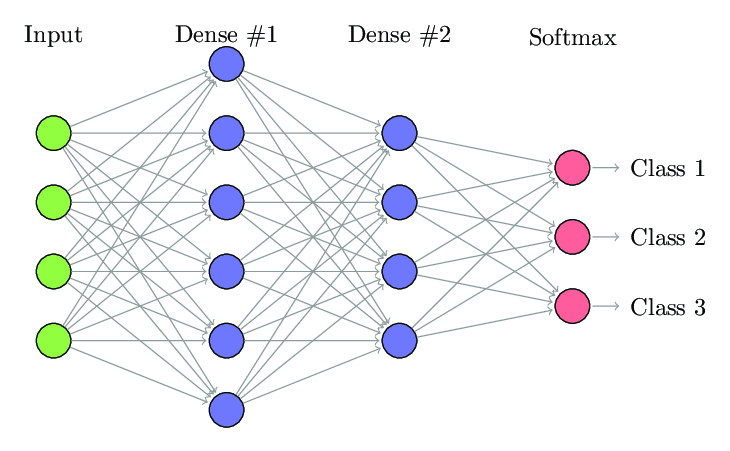

In [47]:
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history_dense = model_dense.fit(xlfw_train, ylfw_train, validation_data=(xlfw_val, ylfw_val),batch_size = 64, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 15ms/step - loss: 1.8630 - accuracy: 0.2920 - val_loss: 1.7740 - val_accuracy: 0.3991
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.7807 - accuracy: 0.3960 - val_loss: 1.7346 - val_accuracy: 0.4056
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.7209 - accuracy: 0.4020 - val_loss: 1.6869 - val_accuracy: 0.3991
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.6878 - accuracy: 0.4140 - val_loss: 1.6545 - val_accuracy: 0.4635
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.6540 - accuracy: 0.4320 - val_loss: 1.6266 - val_accuracy: 0.4828
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.6451 - accuracy: 0.4680 - val_loss: 1.6318 - val_accuracy: 0.4700
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.6035 - accuracy: 0.4640 - val_loss: 1.5653 - val_accuracy: 0.4571
Epoch 8/100
8/8 [=========

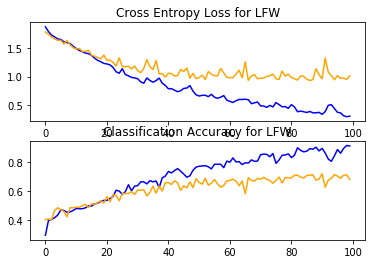

In [49]:
#traing vs evaluation(Loss and Accuracy)
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss for LFW')
plt.plot(history_dense.history['loss'], color='blue', label='train')
plt.plot(history_dense.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for LFW')
plt.plot(history_dense.history['accuracy'], color='blue', label='train')
plt.plot(history_dense.history['val_accuracy'], color='orange', label='test')

In [50]:
##Performance testing
#On test data(x_test to prediction & y_test)
ylfw_pred_dense = model_dense.predict_classes(xlfw_test)
ylfw_test_dense = np.argmax(ylfw_test,axis=1)
print(classification_report(ylfw_test_dense, ylfw_pred_dense))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.36      0.38      0.37        13
           1       0.75      0.82      0.78        60
           2       0.48      0.85      0.61        27
           3       0.94      0.75      0.83       146
           4       0.50      0.40      0.44        25
           5       0.82      0.60      0.69        15
           6       0.48      0.64      0.55        36

    accuracy                           0.71       322
   macro avg       0.62      0.63      0.61       322
weighted avg       0.75      0.71      0.72       322



In [51]:
###SELFLEARNING
#https://deeplizard.com/learn/video/YRhxdVk_sIs
#Suppose that this grayscale image (single color channel) of a seven from the MNIST data set is our input:
#Let’s suppose that we have four 3 x 3 filters for our first convolutional layer, and these filters are filled with the values you see below. These values can be represented visually by having -1s correspond to black, 1s correspond to white, and 0s correspond to grey.
#The sliding is referred to as convolving, so really, we should say that this filter is going to convolve across each 3 x 3 block of pixels from the input.
#If we convolve our original image of a seven with each of these four filters individually, this is what the output would look like for each filter:
#We can see that all four of these filters are detecting edges. In the output channels, the brightest pixels can be interpreted as what the filter has detected. 
#The amazing thing is that the pattern detectors are derived automatically by the network. The filter values start out with random values, and the values change as the network learns during training. The pattern detecting capability of the filters emerges automatically.

In [52]:
#Initialising the Sequential model for Convolutional Layers
model_lfw = Sequential()

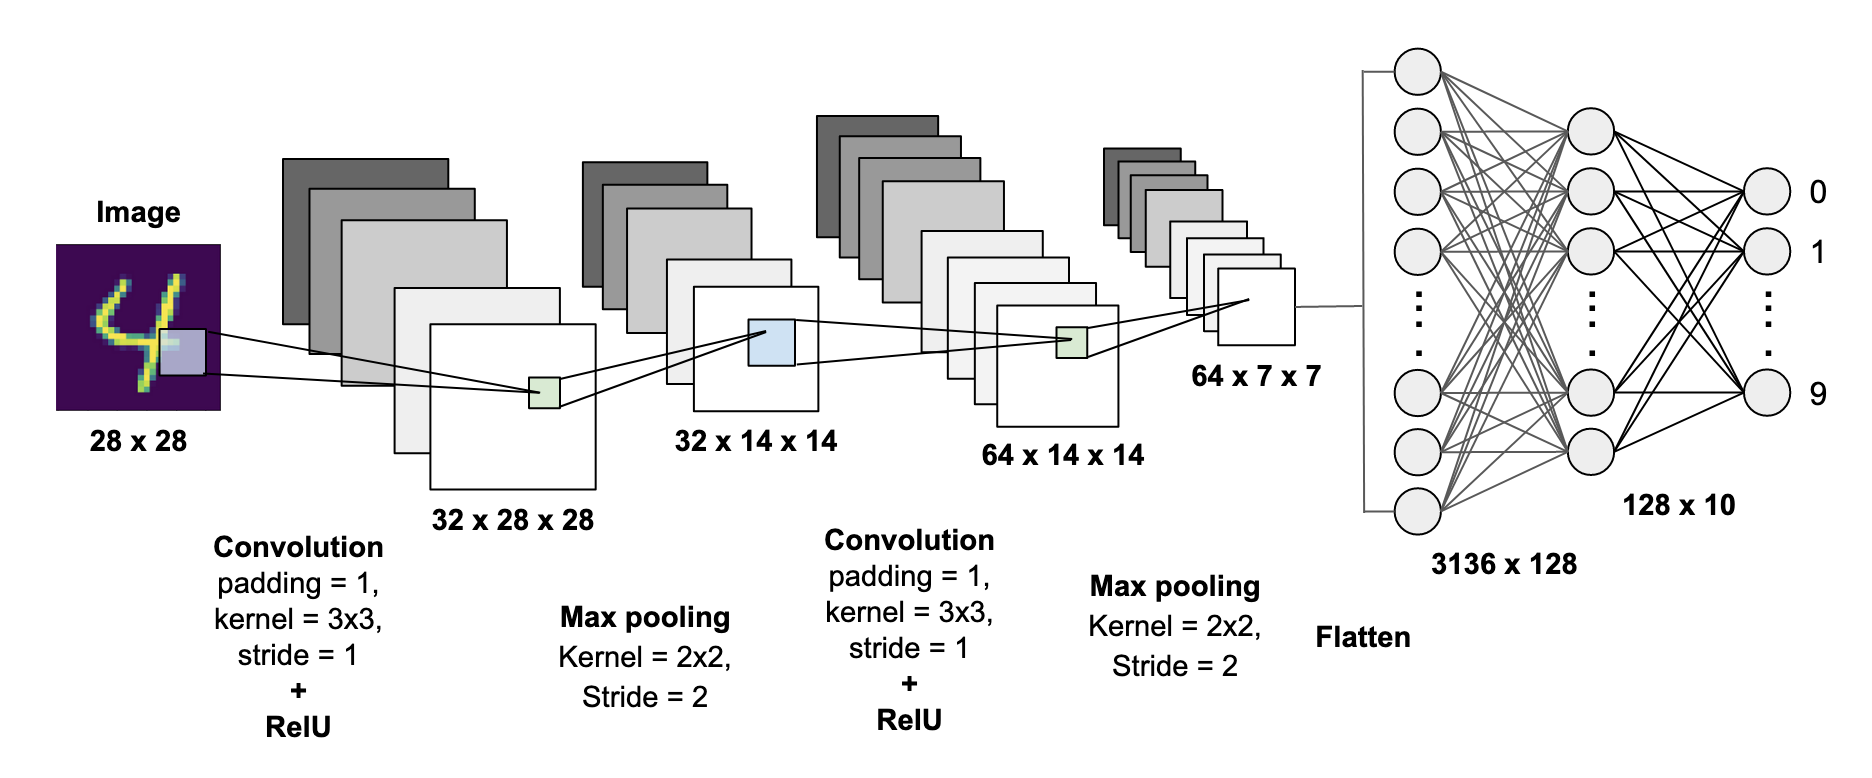

In [53]:
# Adding layers to the model
model_lfw.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(50,37,1)))
model_lfw.add(Conv2D(32, kernel_size=3, activation='relu'))
model_lfw.add(Flatten())
model_lfw.add(Dense(7, activation='softmax'))

In [54]:
model_lfw.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
history_lfw = model_lfw.fit(xlfw_train, ylfw_train, validation_data=(xlfw_val, ylfw_val),batch_size = 64, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 68ms/step - loss: 1.8593 - accuracy: 0.2720 - val_loss: 1.7720 - val_accuracy: 0.3991
Epoch 2/100
8/8 [==============================] - 0s 62ms/step - loss: 1.7200 - accuracy: 0.3960 - val_loss: 1.6582 - val_accuracy: 0.3991
Epoch 3/100
8/8 [==============================] - 0s 60ms/step - loss: 1.6410 - accuracy: 0.3960 - val_loss: 1.5938 - val_accuracy: 0.3991
Epoch 4/100
8/8 [==============================] - 0s 60ms/step - loss: 1.5367 - accuracy: 0.4040 - val_loss: 1.4866 - val_accuracy: 0.4528
Epoch 5/100
8/8 [==============================] - 0s 60ms/step - loss: 1.3290 - accuracy: 0.5240 - val_loss: 1.3338 - val_accuracy: 0.5622
Epoch 6/100
8/8 [==============================] - 0s 59ms/step - loss: 1.0592 - accuracy: 0.6420 - val_loss: 1.1712 - val_accuracy: 0.5966
Epoch 7/100
8/8 [==============================] - 0s 59ms/step - loss: 0.8065 - accuracy: 0.7460 - val_loss: 1.1755 - val_accuracy: 0.5751
Epoch 8/100
8/8 [===

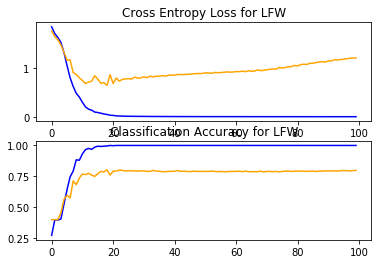

In [56]:
# Plotting Cross Entropy Loss and Classification Accuracy for training and val LFW data
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss for LFW')
plt.plot(history_lfw.history['loss'], color='blue', label='train')
plt.plot(history_lfw.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for LFW')
plt.plot(history_lfw.history['accuracy'], color='blue', label='train')
plt.plot(history_lfw.history['val_accuracy'], color='orange', label='test')

In [57]:
# Classification Report
ylfw_pred = model_lfw.predict_classes(xlfw_test)
ylfw_test = np.argmax(ylfw_test,axis=1)
print(classification_report(ylfw_test, ylfw_pred))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.82      0.78      0.80        60
           2       0.61      0.63      0.62        27
           3       0.83      0.92      0.87       146
           4       0.80      0.64      0.71        25
           5       0.86      0.40      0.55        15
           6       0.73      0.75      0.74        36

    accuracy                           0.79       322
   macro avg       0.77      0.68      0.71       322
weighted avg       0.79      0.79      0.79       322



In [58]:
#Loading the CIFAR10 data set from keras.datasets
from tensorflow.keras.datasets import cifar10
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

170500096/170498071 [==============================] - 329s 2us/step


In [59]:
train_X.shape, test_X.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [60]:
train_y.shape, test_y.shape

((50000, 1), (10000, 1))

In [61]:
#Implementing one-hot encoding on Training and test data target variables
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [62]:
# Splitting the training data into validation and training data
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

val_X,train_X = train_X[:9000]/255.0, train_X[9000:]/255.0
val_y,train_y = train_y[:9000], train_y[9000:]

test_X = test_X/255.0

In [63]:
##SELFLEARNING
#https://deeplizard.com/learn/video/ZjM_XQa5s6s
#When added to a model, max pooling reduces the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
#why do we need dropout at all? Why do we need to literally shut-down parts of a neural networks?
#The answer to these questions is “to prevent over-fitting”.



In [64]:
# Building model with convolutional, maxpooling, and dense layers
model_cifar = Sequential()
model_cifar.add(Conv2D(32, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
model_cifar.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_cifar.add(MaxPooling2D((2, 2)))
model_cifar.add(Dropout(0.2))
model_cifar.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cifar.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cifar.add(MaxPooling2D((2, 2)))
model_cifar.add(Dropout(0.2))
model_cifar.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cifar.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cifar.add(MaxPooling2D((2, 2)))
model_cifar.add(Dropout(0.2))
model_cifar.add(Flatten())
model_cifar.add(Dense(64, activation='relu'))
model_cifar.add(Dropout(0.2))
model_cifar.add(Dense(10, activation='softmax'))

In [65]:
model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
hist_train = model_cifar.fit(train_X, train_y, batch_size=64,validation_data=(val_X, val_y), epochs=50)

Epoch 1/50
641/641 [==============================] - 66s 103ms/step - loss: 1.7714 - accuracy: 0.3397 - val_loss: 1.3658 - val_accuracy: 0.4946
Epoch 2/50
641/641 [==============================] - 66s 104ms/step - loss: 1.3261 - accuracy: 0.5192 - val_loss: 1.0892 - val_accuracy: 0.6090
Epoch 3/50
641/641 [==============================] - 67s 104ms/step - loss: 1.1200 - accuracy: 0.6000 - val_loss: 1.0035 - val_accuracy: 0.6408
Epoch 4/50
641/641 [==============================] - 67s 104ms/step - loss: 1.0037 - accuracy: 0.6445 - val_loss: 0.8842 - val_accuracy: 0.6812
Epoch 5/50
641/641 [==============================] - 66s 104ms/step - loss: 0.9076 - accuracy: 0.6813 - val_loss: 0.8237 - val_accuracy: 0.7067
Epoch 6/50
641/641 [==============================] - 67s 104ms/step - loss: 0.8403 - accuracy: 0.7073 - val_loss: 0.7950 - val_accuracy: 0.7193
Epoch 7/50
641/641 [==============================] - 67s 104ms/step - loss: 0.7847 - accuracy: 0.7271 - val_loss: 0.8007 - val_ac

In [67]:
# Classification Report
cifar_pred = model_cifar.predict_classes(test_X)
test_y = np.argmax(test_y,axis=1)
print(classification_report(test_y, cifar_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.93      0.88      0.90      1000
           2       0.77      0.66      0.71      1000
           3       0.68      0.60      0.64      1000
           4       0.70      0.84      0.76      1000
           5       0.79      0.67      0.72      1000
           6       0.74      0.90      0.81      1000
           7       0.85      0.84      0.85      1000
           8       0.87      0.89      0.88      1000
           9       0.85      0.90      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



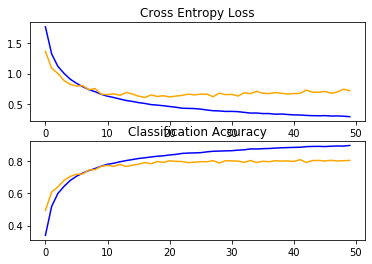

In [68]:
# Plotting Cross Entropy Loss and Classification Accuracy for CIFAR-10
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(hist_train.history['loss'], color='blue', label='train')
plt.plot(hist_train.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(hist_train.history['accuracy'], color='blue', label='train')
plt.plot(hist_train.history['val_accuracy'], color='orange', label='test')

In [85]:
#PART3: UNET on OASIS DATASET

In [41]:
pip install keras pandas matplotlib tqdm scikit-image sklearn tensorflow-gpu tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
###SELFSTUDY
#tqdm: ~ derives from the Arabic word taqaddum (تقدّم) which can mean “progress,Instantly make your loops show a smart progress meter - just wrap any iterable with tqdm(iterable)
#os.walk: ~ Generate the file names in a directory tree by walking the tree either top-down or bottom-up. For each directory in the tree rooted at directory top (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames).https://pythoner.name/en/walk.
# plt.style.use("ggplot"): allows me to use the ggplot style for plots
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
#The itertools is a module in Python having a collection of functions that are used for handling iterators.One such itertools function is chain().https://www.geeksforgeeks.org/python-itertools-chain/

In [14]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical

In [9]:
# Initialising the compression dimensions
img_width = 128
img_height = 128
border = 5

#SELF STUDY :
Ans:

QnA1:Mainly two groups: 1. keras_png_slices_*  are your input images 2. keras_png_slices_seg_* are your label images (or segmentation image).

Each group is divided into three sets which are test, train and validate.  Obvious, test for testing, train for training and validate for validation

In the previous task, the label is a group number ,but in this task is a group of pictures, so should I transfer these pictures to the group of numbers?  Doing clustering? or other method?

If it shouldn't be transfered to a group of numbers, how to use these pictures as labels?

You use the segmentation images as labels in this task. The task you are performing here is called semantic segmentation. Unfortunately, we can tell you how to use these pictures as labels and it is your job to learn how to use them. The general idea to perform a technique called one-hot encoding to them so you have multi-channel segmentation volumes and build the model according. If you have questions regarding what happens in deep learning and how to build the model, please go through the lecture last week.

QnA2:Segmentation folders contain all label images. They are very easy to distinguish. Label image has discrete values with each value represents a label. 

QnA3:The labels are

0 - Background

1 - CSF (cerebrospinal fluid)

2 - Gray matter

3 - White matter

QnA4:segmented image preprocessing
with respect to u-net : I am not sure what preprocessing need to be don on segmented images before they can be used in training. I tried to fit a model but accuracy and loss are fixed and not improving. 

Labels need to be one-hot encoded. Each class will have its own channel occupied by ones and zeros
thanks a lot for the feedback. If I understand the answer correctly then I need to have 4 channels in each label image. right? 

yes you should one-hot encode your lable images into 4 channels. However, one thing you need to pay attention is the values of the label images. You should preprocess your label images into single digits and uint8. (e.g. you have 3 classes, your label image should only contain values 0,1,2 
Thanks Wei Dai , do you mean that I need to pre-process the label image to change pixel values to class indices then apply on hot encoding ?

If you one hot encode your labels the values should only be 0s and 1s
Did you mean 3 foreground classes? It is the same as saying 4 classes including the background. 
Train/Val/test data should have the exact same format ], the only difference being they contain samples. You should use training set for training. Validations set for detecting overfitting during training and test set for final testing before deployment 


In [10]:
# Extracting the file names of the images and masks in training, test and validation folders 
ids_train = next(os.walk("H:/svn/keras_png_slices_data/keras_png_slices_train"))[2] 
ids_test = next(os.walk("H:/svn/keras_png_slices_data/keras_png_slices_test"))[2]
ids_val = next(os.walk("H:/svn/keras_png_slices_data/keras_png_slices_validate"))[2]
ids_seg_train = next(os.walk("H:/svn/keras_png_slices_data/keras_png_slices_seg_train"))[2]
ids_seg_test = next(os.walk("H:/svn/keras_png_slices_data/keras_png_slices_seg_test"))[2]
ids_seg_val = next(os.walk("H:/svn/keras_png_slices_data/keras_png_slices_seg_validate"))[2]
print("No. of images in training folder= ", len(ids_train))
print("No. of images in test folder= ", len(ids_test))
print("No. of images in validation folder= ", len(ids_val))


No. of images in training folder=  9664
No. of images in test folder=  544
No. of images in validation folder=  1120


#SELFSTUDY:
#numpy. zero return a new array of given shape and type, filled with zeros.
#for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):https://stackoverflow.com/questions/49642866/python-for-loop-multiple-values-objects-after-in : You can ignore the tqdm function because if you were to remove it the only thing that would be different is you wouldn't see a load bar but everything else would work just fine. This code
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
works the same as just without a load bar.
for n, id_ in enumerate(test_ids):
what enumerate does is places the index number of each item in a tuple that is given in a new dimension of the array. So if the array input was 1D then the output array would be 2D with one dimension the indexes and the other the values. lets say your test_ids are [(2321),(2324),(23213)] now with enumerate the list now looks like [(0,2321),(1,2324),(2,23213)] what putting a comma does is once given a value (from our case the for loop) say (0,2321) is separate each tuple value in the order they are given so in this case they would equal n = 0 and id_ = 2321

In [21]:
# Function for loading images from the folders
def loading_img(inp_path,ids):
    X = np.zeros((len(ids), img_height, img_width, 1), dtype=np.float32)
    for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)): 
        # Load images
        img = load_img(inp_path+id_, color_mode = 'grayscale')
        x_img = img_to_array(img)
        x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
        X[n] = x_img/255
        
    return X

In [22]:
def loading_seg(inp_path,ids):
    X = np.zeros((len(ids), img_height, img_width, 1), dtype=np.uint8)
    for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
        # Load images
        img = load_img(inp_path+id_, color_mode = 'grayscale')
        x_img = img_to_array(img)
        x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
        X[n] = x_img
        
    return X

In [23]:
# Loading the images and the masks for the training data set
XOasis_train= loading_img("H:/svn/keras_png_slices_data/keras_png_slices_train/",ids_train)

C:\Users\s4552215\.conda\envs\pg\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [24]:
print("No. of images in XOasis training folder= ", len(XOasis_train))

No. of images in XOasis training folder=  9664


In [25]:
yOasis_train= loading_seg("H:/svn/keras_png_slices_data/keras_png_slices_seg_train/",ids_seg_train)   
print("No. of images in yOasis training folder= ", len(yOasis_train))

C:\Users\s4552215\.conda\envs\pg\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



No. of images in yOasis training folder=  9664


In [26]:
# Loading the images and the masks for the test data set
XOasis_test= loading_img("H:/svn/keras_png_slices_data/keras_png_slices_test/",ids_test)
yOasis_test = loading_seg("H:/svn/keras_png_slices_data/keras_png_slices_seg_test/",ids_seg_test)

C:\Users\s4552215\.conda\envs\pg\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


C:\Users\s4552215\.conda\envs\pg\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Loading the images and the masks for the validation data set
XOasis_val= loading_img("H:/svn/keras_png_slices_data/keras_png_slices_validate/",ids_val)
yOasis_val = loading_seg("H:/svn/keras_png_slices_data/keras_png_slices_seg_validate/",ids_seg_val)

C:\Users\s4552215\.conda\envs\pg\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


C:\Users\s4552215\.conda\envs\pg\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


SelfSTUDY:
#In Python 3, they made the / operator do a floating-point division, and added the // operator to do integer division (i.e. quotient without remainder)

255(0 to 255 pix for grey) / 85 = 3; 85 * 3 =255. 3 as black,white grey layers

In [28]:
yOasis_train_sc = yOasis_train//85
yOasis_test_sc = yOasis_test//85
yOasis_val_sc = yOasis_val//85

In [29]:
yOasis_test_sc

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [30]:
yOasis_train_cat = to_categorical(yOasis_train_sc)
yOasis_test_cat = to_categorical(yOasis_test_sc)
yOasis_val_cat = to_categorical(yOasis_val_sc)

In [31]:
yOasis_train_cat

array([[[[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        ...,

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
 

In [1]:
# Build the UNET model

#input(128*128*1[number of channel])->2 layers of C1(128*128*16[number of filters])->P1(64*64*32)-> 2 Layers of c2(64*64*32)

#padding=same(we want output image as the same dimension of input image)
#Conv=3*3 ReLU
#Maxpool=2*2 ;stride=2
#Upsample=2*2
#Final Conv=1*1
#Dropout betwn conv steps to prevent overfitting


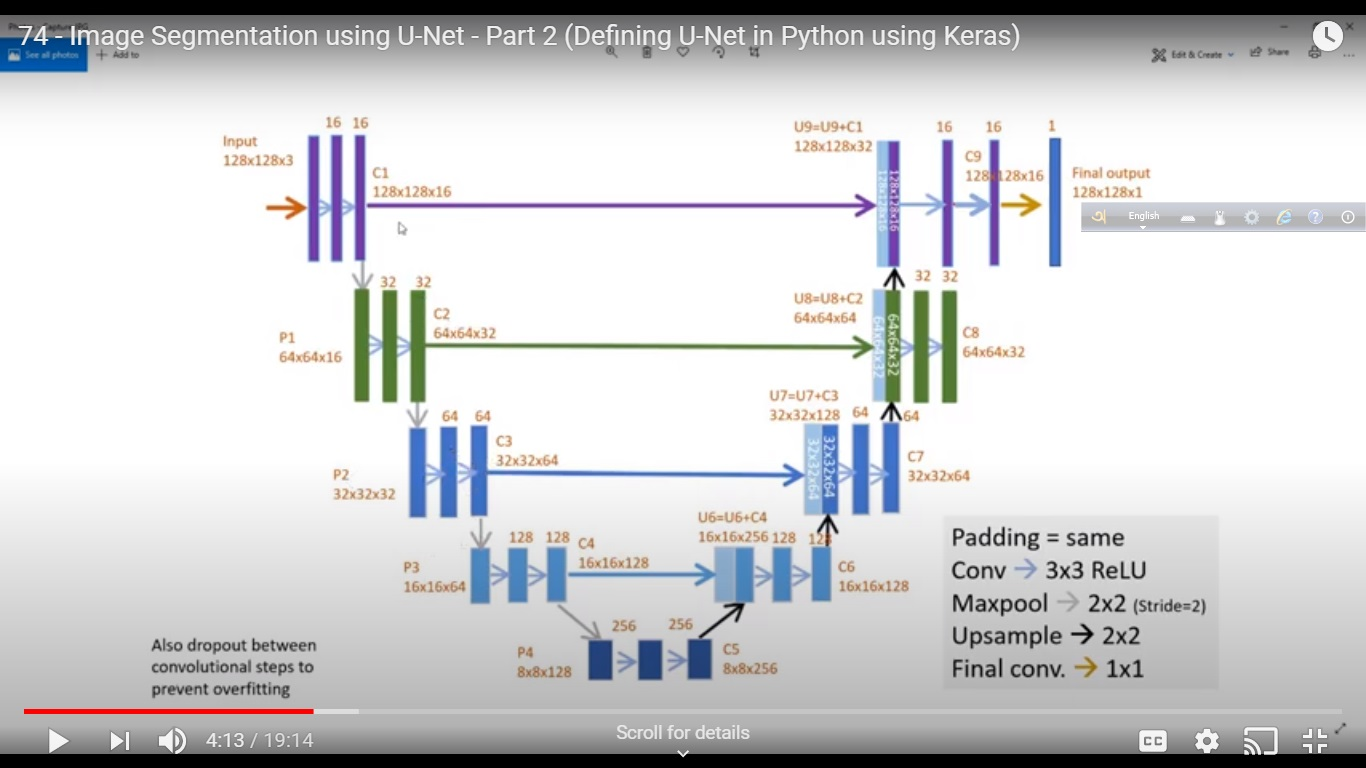

In [6]:
#Layers module in Keras deals with Conv,recurring,maxpooling,Normalaization etc
#Input layer
inputs = tf.keras.layers.Input((128,128,1)) 

In [17]:
#convolution layers
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)
#Converting all inputs int to floating;lambda is a python function

##contraction path:
c1 =tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(s)
#feature dimension=16,kernel size=3,3; 
#deep neural network always update the weights so we need a strating weight to get started,
#from there kernel initializer comes up,which get updated.
#he_normal = trunkated normal distribution(centered around zero,doesnot go far like normal !! distribution!)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 =tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c1)
#dropping 10% of c1 to reduce overfitting
p1=tf.keras.layers.MaxPooling2D((2,2))(c1)


c2 =tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 =tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c2)
p2=tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 =tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 =tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c3)
p3=tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 =tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 =tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c4)
p4=tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 =tf.keras.layers.Conv2D(256,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 =tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)


##EXPANSIVE PATH
u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(32,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(32,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(16,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(4,(1,1), activation='softmax')(c9)
model= tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

#optimizer is a module that contain lot of backpropagation algoritham that can train our model.Optimizer tries to minimize the loss function.When optimizer finds minimum loss function it stop iteration.

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 128, 128, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 128, 128, 16) 160         lambda_3[0][0]                   
__________________________________________________________________________________________________
dropout_11 (Dropout)            (None, 128, 128, 16) 0           conv2d_24[0][0]                  
_______________________________________________________________________________________

In [32]:
# Providing conditions for the training to stop based on validation loss
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-OASIS.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [33]:
results = model.fit(XOasis_train, yOasis_train_cat, batch_size=32, epochs=20, callbacks=callbacks,validation_data=(XOasis_val, yOasis_val_cat))

Epoch 1/20
302/302 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.8285
Epoch 00001: val_loss improved from inf to 0.25726, saving model to model-OASIS.h5
302/302 [==============================] - 439s 1s/step - loss: 0.3686 - accuracy: 0.8285 - val_loss: 0.2573 - val_accuracy: 0.8772
Epoch 2/20
302/302 [==============================] - ETA: 0s - loss: 0.2452 - accuracy: 0.8800
Epoch 00002: val_loss improved from 0.25726 to 0.24027, saving model to model-OASIS.h5
302/302 [==============================] - 438s 1s/step - loss: 0.2452 - accuracy: 0.8800 - val_loss: 0.2403 - val_accuracy: 0.8861
Epoch 3/20
302/302 [==============================] - ETA: 0s - loss: 0.2382 - accuracy: 0.8850
Epoch 00003: val_loss improved from 0.24027 to 0.23833, saving model to model-OASIS.h5
302/302 [==============================] - 443s 1s/step - loss: 0.2382 - accuracy: 0.8850 - val_loss: 0.2383 - val_accuracy: 0.8876
Epoch 4/20
302/302 [==============================] - ETA: 

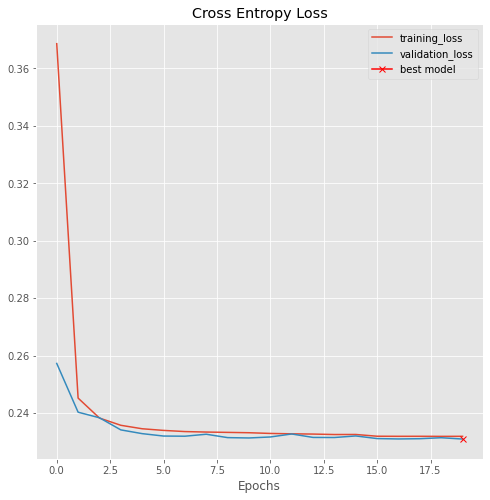

In [34]:
# Plotting the training and validation loss with respect to epochs
plt.figure(figsize=(8, 8))
plt.title("Cross Entropy Loss")
plt.plot(results.history["loss"], label="training_loss")
plt.plot(results.history["val_loss"], label="validation_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.legend();

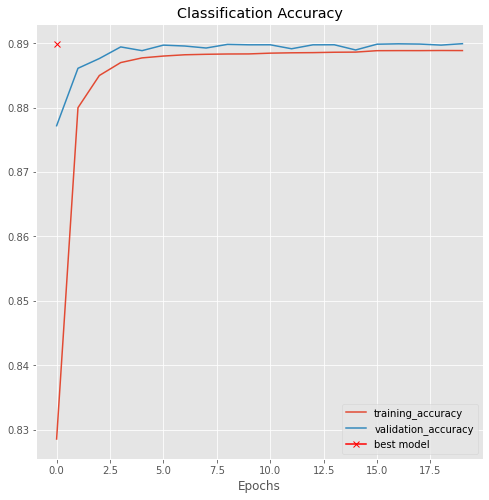

In [35]:
# Plotting the training and validation accuracy with respect to epochs
plt.figure(figsize=(8, 8))
plt.title("Classification Accuracy")
plt.plot(results.history["accuracy"], label="training_accuracy")
plt.plot(results.history["val_accuracy"], label="validation_accuracy")
plt.plot( np.argmin(results.history["val_accuracy"]), np.max(results.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.legend();

In [36]:
# load the best model
model.load_weights('model-OASIS.h5')

In [37]:
test_preds = model.predict(XOasis_test, verbose=1)


17/17 [==============================] - 4s 216ms/step


In [38]:
# Dice Coeffient
from keras import backend as K
def dice_coeff(y_true, y_pred, smooth=1):
    intersect = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersect
    coeff_dice = K.mean((intersect + smooth) / (union + smooth), axis=0)
    return coeff_dice

In [39]:
# Printing Dice Coefficient
dice_coeff(yOasis_test_cat, test_preds, smooth=1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7494081>

In [40]:
def plot_Oasis(X, y, y_pred, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))
    else:
        ix = ix

    

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='gray')
    ax[0].contour(X[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Actual Image')

    ax[1].imshow(y[ix,...,0],cmap='gray')
    ax[1].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[1].set_title('Actual Segment Image')

    ax[2].imshow(y_pred[ix,...,0],cmap='gray')
    ax[2].contour(y_pred[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Predicted Segment Image')

In [41]:
test_preds_arg = np.argmax(test_preds, axis = -1)*85

In [42]:
n,h,w,g = yOasis_test.shape

In [43]:
n,h,w,g

(544, 128, 128, 1)

In [45]:
test_preds_reshape = test_preds_arg.reshape(n,h,w,g)

In [46]:
test_preds_reshape.shape

(544, 128, 128, 1)

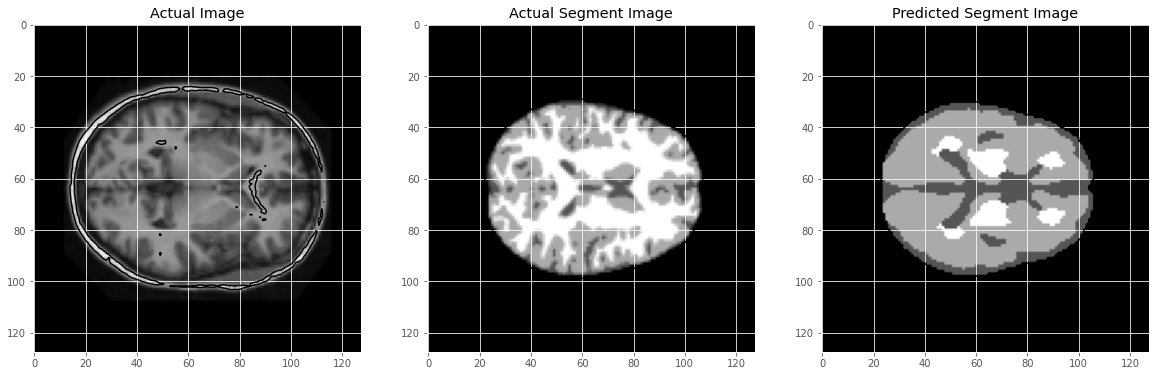

In [48]:
plot_Oasis(XOasis_test,yOasis_test,test_preds_reshape)